In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Preparation

In [48]:
df = pd.read_csv('carprice.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [49]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [50]:
str_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in str_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [51]:
df.isnull().sum()
df = df.fillna(0)
df.msrp = np.log1p(df.msrp)

In [52]:
from sklearn.model_selection import train_test_split
df_fulltrain, df_test = train_test_split(df, test_size=0.2, random_state =1)
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25, random_state =1)
df_train.shape, df_val.shape, df

((7148, 16),
 (2383, 16),
           make       model  year                engine_fuel_type  engine_hp  \
 0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
 1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
 2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
 3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
 4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
 ...        ...         ...   ...                             ...        ...   
 11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
 11913  lincoln      zephyr  2006                regular_unleaded      221.0   
 
        engi

In [53]:
df_train = df_train.reset_index(drop=True)
y_train = df_train.msrp
del df_train['msrp']

df_val = df_val.reset_index(drop=True)
y_val = df_val.msrp
del df_val['msrp']

df_test = df_test.reset_index(drop=True)
y_test = df_test.msrp
del df_test['msrp']

### Encoding

In [54]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')
dict_test = df_test.to_dict(orient = 'records')
dv.fit(dict_train)
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

### Training and Validating the Model

In [55]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
w = lmodel.coef_
w0 = lmodel.intercept_
w, w0

(array([-0.00545723,  0.00986012,  0.06006716, ..., -0.09791402,
        -0.06747942,  0.03738444], shape=(1046,)),
 np.float64(-65.26473910648342))

In [56]:
predict = lmodel.predict(X_val)

In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predict, y_val))

np.float64(0.22431793135130162)

In [58]:
def rmse(y_predict, y_actual):
    mean_square = np.mean((y_predict - y_actual) ** 2)
    return np.sqrt(mean_square)

rmse(predict, y_val)

np.float64(0.22431793135130162)

In [72]:
from sklearn.linear_model import Ridge
rmodel = Ridge(alpha = 0.1)
rmodel.fit(X_train, y_train)
rpredict = rmodel.predict(X_val)
rmse(rpredict, y_val)

np.float64(0.20995805398396564)

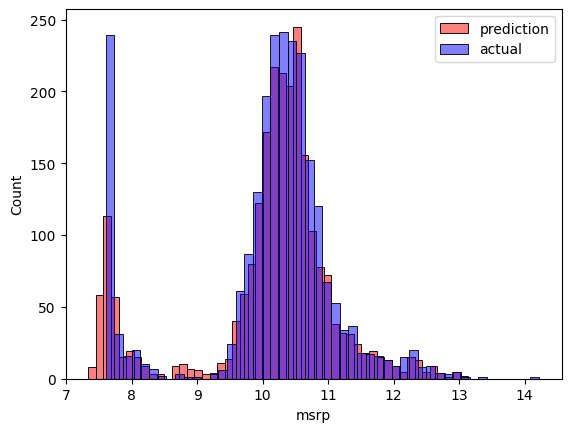

In [60]:
import seaborn as srn
srn.histplot(rpredict, label='prediction', color='red', alpha=0.5, bins=50)
srn.histplot(y_val, label='actual', color='blue', alpha=0.5, bins=50)
plt.legend()

In [74]:
rmodel.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
rpredict  = rmodel.predict(X_test)
rmse(rpredict, y_test)

np.float64(0.1912366409415642)

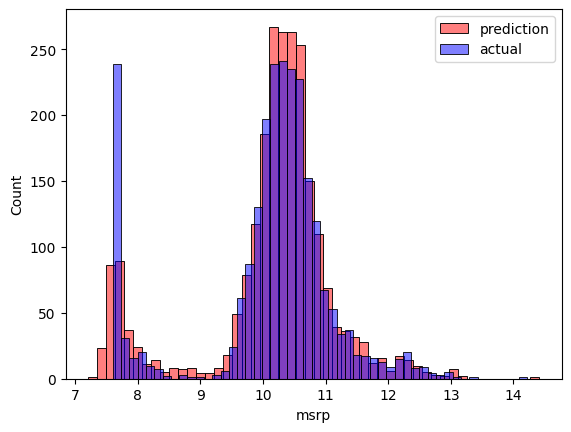

In [75]:
srn.histplot(rpredict, label='prediction', color='red', alpha=0.5, bins=50)
srn.histplot(y_val, label='actual', color='blue', alpha=0.5, bins=50)
plt.legend()